In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField

## 10 by 10 Network
We simulate current flowing through a network with two electrodes connected at the diagnoal.
The voltages are respectiveley $\pm0.1$ V.
It shows how the current is flowing from one side to the other.

In [56]:
net = Network(10,10,1,[[0,0,0],[0,9,0],[9,4,0]])
net.set_voltage_config([0.21, 0.2, -0.1], 0)
mf = MeanField(net)
macrostate = np.zeros(100)

In [55]:
macrostate = mf.numeric_integration_solve(macrostate, N = 800)
print(mf.convergence_metric(macrostate))

5.663952481915757e-06


In [59]:
macrostate = mf.confidence_based_solve(macrostate, N = 800)
print(mf.convergence_metric(macrostate))

4.3331674026703126e-07


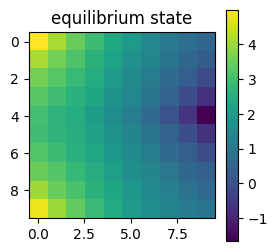

In [63]:
plt.figure(figsize=(3,3))
plt.imshow(macrostate.reshape(10,10))
plt.colorbar()
plt.title("equilibrium state")
plt.savefig("../output/grid_equilibrium.png")

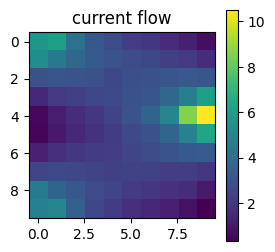

In [64]:
plt.figure(figsize = (3,3))
plt.imshow(np.sum(np.abs(mf.calc_expected_island_currents(macrostate)), axis = 1).reshape(10,10))
plt.colorbar()
plt.title("current flow")
plt.savefig("../output/grid_currentflow.png")